In [1]:
import numpy as np
import random
import copy
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

In [2]:
teachers = [
    "Andi Wijaya", "Budi Santoso", "Citra Dewi", "Dedi Prasetyo", "Eka Putri",
    "Fajar Hadi", "Gita Lestari", "Hadi Saputra", "Intan Sari", "Joko Susilo",
    "Kiki Amalia", "Lina Marlina", "Mira Handayani", "Niko Pratama", "Oki Setiawan",
    "Putri Ayu", "Rina Sulastri", "Sari Nurul", "Tono Saputra", "Umi Zahra",
    "Vina Rahma", "Wawan Kurniawan", "Xavier Lim", "Yuni Astuti", "Zainal Abidin",
    "Arif Budiman", "Bella Sari", "Chandra Dewi", "Dian Kusuma", "Eko Saputra",
    "Farah Nabila", "Guntur Prasetyo", "Hana Safitri", "Ivan Maulana", "Jihan Azizah",
    "Kamal Fauzi", "Laras Putri", "Mukti Raharjo", "Nina Melati", "Omar Said",
    "Putu Adi", "Qoriatul Aini", "Rafiq Hamzah", "Sinta Wulandari", "Teguh Santoso"
]

subjects = [
    "Mathematics", "Indonesian", "English", "Physics", "Chemistry",
    "Biology", "History", "Geography", "Art", "Physical Ed",
    "Economics", "Sociology", "Civics", "ICT", "Music",
    "Health", "Environment", "Literature", "Japanese", "French",
    "German", "Chinese", "Arabic", "Accounting", "Business",
    "Psychology", "Statistics", "Law", "Astronomy", "Anthropology",
    "Marketing", "Engineering", "Architecture", "Drama", "Dance",
    "Film", "Graphic Design", "Photography", "Journalism", "Writing",
    "Public Speaking", "Debate", "Social Studies", "Craft", "Ethics"
]

In [3]:
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
shifts = [
    "07:00-08:30", "08:30-10:00", "10:00-11:30", "11:30-13:00",
    "13:00-14:00 (Break)", "14:00-15:30", "15:30-17:00",
    "17:00-18:30", "18:30-20:00"
]

num_teachers = len(teachers)
num_days = len(days)
num_shifts = len(shifts)
break_shift_index = 4
max_shifts_per_week = 12

In [4]:
def random_schedule():
    schedule = -1 * np.ones((num_days, num_shifts), dtype=int)

    all_slots = [(d, s) for d in range(num_days) for s in range(num_shifts) if s != break_shift_index]
    random.shuffle(all_slots)

    for i, teacher_idx in enumerate(range(num_teachers)):
        d, s = all_slots[i]
        schedule[d, s] = teacher_idx

    for i in range(num_teachers, len(all_slots)):
        d, s = all_slots[i]
        schedule[d, s] = random.randint(0, num_teachers - 1)

    return schedule

In [5]:
def calculate_cost(schedule):
    cost = 0
    counts = [0] * num_teachers
    for d in range(num_days):
        seen = set()
        for s in range(num_shifts):
            if s == break_shift_index:
                if schedule[d, s] != -1:
                    cost += 1000
                continue
            t = schedule[d, s]
            counts[t] += 1
            if t in seen:
                cost += 50
            seen.add(t)
    for c in counts:
        if c > max_shifts_per_week:
            cost += (c - max_shifts_per_week) * 10
    if min(counts) < 1:
        cost += 2000
    return cost

def get_neighbor(schedule):
    neighbor = copy.deepcopy(schedule)
    d = random.randint(0, num_days - 1)
    s = random.randint(0, num_shifts - 1)
    while s == break_shift_index:
        s = random.randint(0, num_shifts - 1)
    neighbor[d][s] = random.randint(0, num_teachers - 1)
    return neighbor

In [6]:
def simulated_annealing(T=3000, T_min=1, alpha=0.9, max_iter=1000):
    current = random_schedule()
    best = current.copy()
    current_cost = calculate_cost(current)
    best_cost = current_cost
    while T > T_min:
        for _ in range(max_iter):
            neighbor = get_neighbor(current)
            neighbor_cost = calculate_cost(neighbor)
            delta = neighbor_cost - current_cost
            if delta < 0 or random.uniform(0, 1) < np.exp(-delta / T):
                current = neighbor
                current_cost = neighbor_cost
                if neighbor_cost < best_cost:
                    best = neighbor.copy()
                    best_cost = neighbor_cost
        T *= alpha
    return best, best_cost

final_schedule, final_cost = simulated_annealing()

In [7]:
def get_initials(name):
    return ''.join([part[0].upper() for part in name.split()])

short_labels = {
    i: f"{get_initials(teachers[i])}\n({subjects[i][:3]})"
    for i in range(num_teachers)
}

In [10]:
heatmap_data = final_schedule.copy()

def get_initials(name):
    return ''.join([part[0].upper() for part in name.split()])

annot = np.empty_like(heatmap_data, dtype=object)
for d in range(num_days):
    for s in range(num_shifts):
        if s == break_shift_index or heatmap_data[d, s] == -1:
            annot[d, s] = ''
        else:
            idx = heatmap_data[d, s]
            annot[d, s] = f"{get_initials(teachers[idx])}\n({subjects[idx][:3]})"

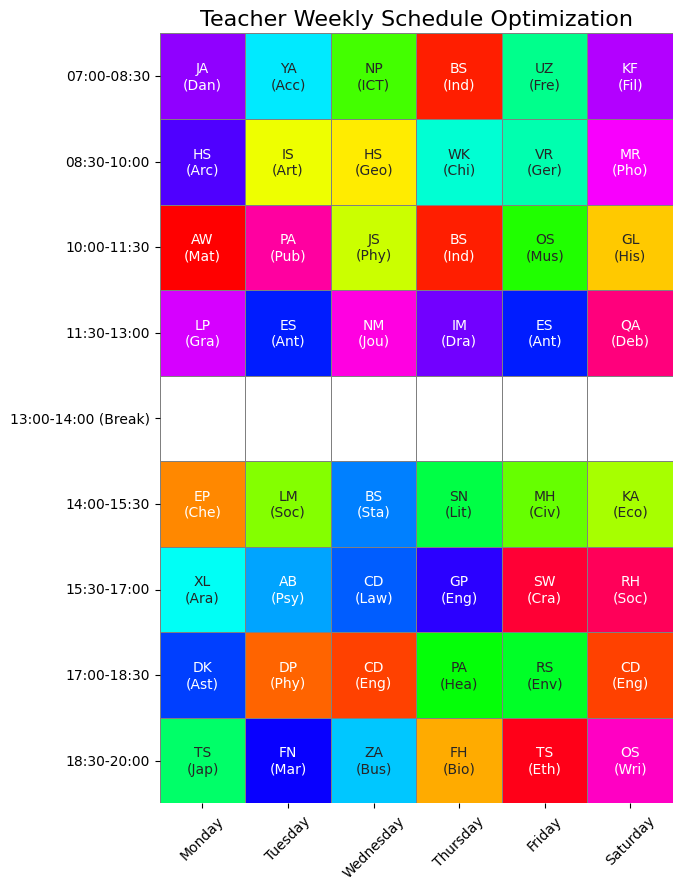

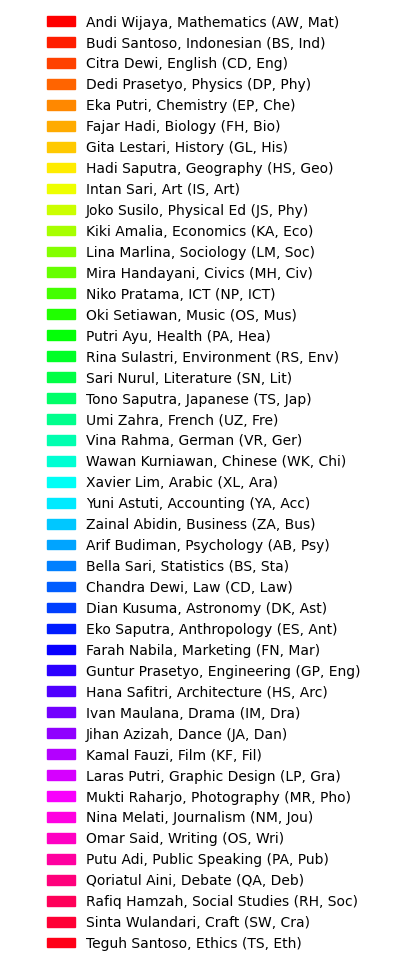

In [12]:
plt.figure(figsize=(18, 10))
sns.heatmap(
    heatmap_data.T,
    annot=annot.T,
    fmt='',
    cmap='hsv',
    cbar=False,
    linewidths=0.5,
    linecolor='gray',
    square=True,
    mask=(heatmap_data.T == -1)
)

plt.xticks(np.arange(num_days) + 0.5, days, rotation=45)
plt.yticks(np.arange(num_shifts) + 0.5, shifts, rotation=0)
plt.title("Teacher Weekly Schedule Optimization", fontsize=16)

colors = plt.cm.hsv(np.linspace(0, 1, num_teachers))
patches = [
    mpatches.Patch(color=colors[i], label=f"{teachers[i]}, {subjects[i]} ({get_initials(teachers[i])}, {subjects[i][:3]})")
    for i in range(num_teachers)
]

plt.figure(figsize=(5, 12))
plt.legend(handles=patches, loc='center', frameon=False)
plt.axis('off')
plt.show()